In [1]:
import numpy as np
import time
import os
from collections import namedtuple, deque

from unityagents import UnityEnvironment
from agent_utils import plot_training_scores

from ddpg_agent import DDPG_Agent
from ddpg_trainer import train_ddpg

import matplotlib.pyplot as plt
%matplotlib inline

SEED = 0
PATH_TO_ENV = 'Tennis_Windows_x86_64/Tennis.exe'

In [2]:
# create the environment
env = UnityEnvironment(file_name=PATH_TO_ENV)

# gather scenario information
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment and grab infos
env_info = env.reset(train_mode=True)[brain_name]

num_agents = len(env_info.agents)
action_size = brain.vector_action_space_size
states = env_info.vector_observations
state_size = states.shape[1]
train_mode = True

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


## Create Agent

In [3]:
# parameters used for the provided agent
agent_params = {
    'name': 'Agent OmegaPong',
    'buffer_size': int(1e6),
    'batch_size': 256,
    'layers_actor': [512, 256],
    'lr_actor': 5e-4,
    'layers_critic': [512, 256, 256],
    'lr_critic': 1e-3,
    'learn_every': 5,
    'learn_passes':5,
    'gamma': 0.99,
    'tau': 5e-3,
    'batch_norm': True,
    'weight_decay':0.0
}

In [4]:
# create the agent
agent = DDPG_Agent(state_size, action_size, brain_name, seed=SEED,
                  params=agent_params)
print(agent.display_params())

{'name': 'Agent OmegaPong', 'buffer_size': 1000000, 'batch_size': 256, 'layers_actor': [512, 256], 'layers_critic': [512, 256, 256], 'lr_actor': 0.0005, 'lr_critic': 0.001, 'gamma': 0.99, 'tau': 0.005, 'weight_decay': 0.0, 'learn_every': 5, 'learn_passes': 5, 'batch_norm': True}


## Train Agent

In [5]:
# train the agent
n_episodes = 3000
max_t = 2000
print_every = 50

goal_score = 0.5
score_window_size = 100
keep_training = True

scores = train_ddpg(env, agent, num_agents,
                        n_episodes=n_episodes, max_t=max_t,
                        print_every=print_every,
                        goal_score=goal_score, score_window_size=score_window_size,
                        keep_training=keep_training)

Saved agent parameters at saved_agents/Agent OmegaPong/

Training started for 'Agent OmegaPong'...
Episode 50	Avg. Score: 0.00	Avg. Steps: 14.14	Total Time: 0.472m
Episode 100	Avg. Score: 0.01	Avg. Steps: 19.10	Total Time: 1.162m
Episode 150	Avg. Score: 0.01	Avg. Steps: 14.20	Total Time: 1.674m
Episode 200	Avg. Score: 0.01	Avg. Steps: 16.14	Total Time: 2.254m
Episode 250	Avg. Score: 0.01	Avg. Steps: 14.18	Total Time: 2.770m
Episode 300	Avg. Score: 0.03	Avg. Steps: 24.92	Total Time: 3.685m
Episode 350	Avg. Score: 0.10	Avg. Steps: 61.38	Total Time: 5.907m
Episode 400	Avg. Score: 0.16	Avg. Steps: 74.76	Total Time: 8.595m
Episode 450	Avg. Score: 0.27	Avg. Steps: 144.64	Total Time: 13.849m
Episode 500	Avg. Score: 0.37	Avg. Steps: 154.40	Total Time: 19.523m
Episode 550	Avg. Score: 0.47	Avg. Steps: 217.62	Total Time: 27.403m
Episode 600	Avg. Score: 0.48	Avg. Steps: 168.98	Total Time: 33.624m
Episode 650	Avg. Score: 0.39	Avg. Steps: 146.76	Total Time: 38.964m
Episode 700	Avg. Score: 0.44	Avg. 

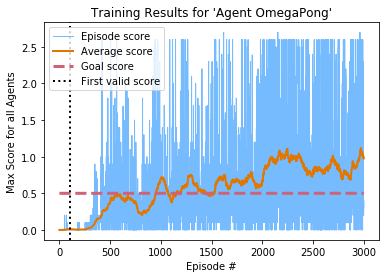

In [6]:
# plot training results
plot_training_scores(scores, goal_score, window=score_window_size,
                    ylabel='Max Score for all Agents',
                    agent_name=agent.name)

## Demo Trained or Saved Agents

In [7]:
# demo the agent trained in this notebook by uncommenting the cells below

#from demos import demo_agent_cont
#demo_scores = demo_agent_cont(env, agent, num_agents, n_episodes=3)


Running demo of 'Agent OmegaPong'
Episode 1	Mean: 1.55, Min: 1.49, Max: 1.60
Episode 2	Mean: 0.55, Min: 0.49, Max: 0.60
Episode 3	Mean: 0.15, Min: 0.09, Max: 0.20

Demo complete! Avg score: 0.745


In [3]:
# load a saved agent and run demo
from demos import demo_saved_agent_cont

demo_agent_name = 'Agent OmegaPong'
demo_saved_agent_cont(env, demo_agent_name, n_episodes=3)

Loaded agent parameters from saved_agents/Agent OmegaPong/
{'name': 'Agent OmegaPong', 'buffer_size': 1000000, 'batch_size': 256, 'layers_actor': [512, 256], 'layers_critic': [512, 256, 256], 'lr_actor': 0.0005, 'lr_critic': 0.001, 'gamma': 0.99, 'tau': 0.005, 'weight_decay': 0.0, 'learn_every': 5, 'learn_passes': 5, 'batch_norm': True}

Running demo of 'Agent OmegaPong'
Episode 1	Mean: 0.35, Min: 0.29, Max: 0.40
Episode 2	Mean: 0.85, Min: 0.79, Max: 0.90
Episode 3	Mean: 2.60, Min: 2.60, Max: 2.60

Demo complete! Avg score: 1.263


In [4]:
# close the environment when complete
env.close()